# Background
A Data Analyst wants to give recommendations for people who have plans to travel to Bangkok. The end goals is to give Airbnb recommendations which:
1. Listing that match your lifestyle
2. Keeping you mindful and demure in your budgeted journey
3. Giving listing suggestion that doesn’t turn you a beggar in foreign land
4. Increase your possibility of getting a room in the middle of peak season listing war
5. Based on facts rather than a mere she said he said

# Stakeholder
People who plans a trip to Bangkok

# Data Cleaning
1. Dropping null values
2. Dropping zero values in price
3. Change value type of last_review from float to datetime
4. Checking on duplication 
5. Dividing listing based on building type (Home/Hotel)
6. Removing outliers in price
7. Removing outliers in minimum nights

## Importing library and displaying the dataset

In [1]:
# Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display Dataset
pd.set_option('display.max_columns',100)
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

## Dropping null values

In [4]:
# Recording null values occurrence
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

There are 4 columns with null values in it, which is name, host_name, last_review, and reviews_per_month.
We decided to drop data with null values in 'name' and 'host_name' considering it is below 30%.

In [5]:
#dropping null values in 'name', 'host_name'
df_clean1 = df.dropna(subset=['name', 'host_name'])

In [6]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15845 non-null  int64  
 1   id                              15845 non-null  int64  
 2   name                            15845 non-null  object 
 3   host_id                         15845 non-null  int64  
 4   host_name                       15845 non-null  object 
 5   neighbourhood                   15845 non-null  object 
 6   latitude                        15845 non-null  float64
 7   longitude                       15845 non-null  float64
 8   room_type                       15845 non-null  object 
 9   price                           15845 non-null  int64  
 10  minimum_nights                  15845 non-null  int64  
 11  number_of_reviews               15845 non-null  int64  
 12  last_review                     10061

While for column last_review, and reviews_per_month, we decided to do additional checking as there is chance that null values in last_review and reviews_per_month are align with no reviews at all, means, might correlating with popularity level.

In [7]:
#checking on what makes "last_review" null with summing value of reviews
df_rev1 = df_clean1[df_clean1["last_review"].isna()]
df_null_rev1 = df_rev1[['room_type', 'number_of_reviews', 'reviews_per_month']].groupby(['room_type', 'number_of_reviews']).sum()
df_null_rev1

,,reviews_per_month
room_type,number_of_reviews,
Entire home/apt,0,0.0
Hotel room,0,0.0
Private room,0,0.0
Shared room,0,0.0


In [8]:
#checking on what makes "reviews_per_month" null with summing value of reviews
df_rev2 = df_clean1[df_clean1["reviews_per_month"].isna()]
df_null_rev2 = df_rev2[['room_type', 'number_of_reviews', 'reviews_per_month']].groupby(['room_type', 'number_of_reviews']).sum()
df_null_rev2

,,reviews_per_month
room_type,number_of_reviews,
Entire home/apt,0,0.0
Hotel room,0,0.0
Private room,0,0.0
Shared room,0,0.0


Rows with null values in last_review and reviews_per_month return zero when number_of_reviews are sum. Meaning, null value in both columns is actually showing no reviews was made in related listing. Thus we decided to not drop it nor fill it considering it will make a bias data when it comes to analyzing listing popularity.  

## Dropping zero values in price

In [9]:
# Count listings with zero price
zero_price_count = df_clean1[df_clean1['price'] == 0].shape[0]

# Calculate percentage of zero price listings
total_listings = df_clean1.shape[0]
zero_price_percentage = (zero_price_count / total_listings) * 100

# Display the results
print("Number of listings with zero price:", zero_price_count)
print("Percentage of listings with zero price:", zero_price_percentage, "%")

Number of listings with zero price: 1
Percentage of listings with zero price: 0.006311139160618491 %


We understand that zero price might be an input error. Thus we decided to drop it.

In [10]:
#dropping listing with zero price
# Drop listings with zero price
df_clean2 = df_clean1[df_clean1['price'] != 0].reset_index(drop=True)

# Display the updated DataFrame shape
print("Updated number of listings:", df_clean2.shape[0])

Updated number of listings: 15844


In [11]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15844 entries, 0 to 15843
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15844 non-null  int64  
 1   id                              15844 non-null  int64  
 2   name                            15844 non-null  object 
 3   host_id                         15844 non-null  int64  
 4   host_name                       15844 non-null  object 
 5   neighbourhood                   15844 non-null  object 
 6   latitude                        15844 non-null  float64
 7   longitude                       15844 non-null  float64
 8   room_type                       15844 non-null  object 
 9   price                           15844 non-null  int64  
 10  minimum_nights                  15844 non-null  int64  
 11  number_of_reviews               15844 non-null  int64  
 12  last_review                     

## Change last_review from float to datetime
Understood from above, last_review value is recorded in float instead of datetime, so we might as well changed it to datetime to make its values relevant. We also fill null values in it as NaT, null values specific for datetime to avoid errors in later analysis.

In [12]:
#change 'last_review' from float format to datetime while filling null values as NaT
df_clean2['last_review'] = pd.to_datetime(df_clean2['last_review'], errors='coerce')
df_clean2['reviews_per_month'].fillna(0, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7576\106901635.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2['reviews_per_month'].fillna(0, inplace=True)


In [13]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15844 entries, 0 to 15843
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15844 non-null  int64         
 1   id                              15844 non-null  int64         
 2   name                            15844 non-null  object        
 3   host_id                         15844 non-null  int64         
 4   host_name                       15844 non-null  object        
 5   neighbourhood                   15844 non-null  object        
 6   latitude                        15844 non-null  float64       
 7   longitude                       15844 non-null  float64       
 8   room_type                       15844 non-null  object        
 9   price                           15844 non-null  int64         
 10  minimum_nights                  15844 non-null  int64         
 11  nu

## Checking on duplication

In [14]:
#checking on duplications based on id listing
has_duplicates1 = df_clean1['id'].duplicated().any()
print("Are there duplicates in the 'id' column?", has_duplicates1)


Are there duplicates in the 'id' column? False


Result above showing no duplications of units data

## Removing price outliers

In [15]:
# Aggregate median, max, and min for 'price' based on neighbourhood
price_stats = df_clean2.groupby('neighbourhood')['price'].agg(
    median_price='median',
    max_price='max',
    min_price='min'
).reset_index().sort_values(by='median_price', ascending=False)
print(price_stats)

           neighbourhood  median_price  max_price  min_price
27             Nong Chok        2539.0       8658        310
29           Parthum Wan        2400.0     300000        331
47               Vadhana        2000.0    1100000        350
39        Samphanthawong        2000.0      15000        350
8               Bang Rak        1850.0     300000        295
34  Pom Prap Sattru Phai        1709.0      18355        330
22           Khlong Toei        1700.0    1000000        332
37           Ratchathewi        1536.0     300000        320
43           Taling Chan        1502.5      15493        317
25             Lat Phrao        1500.0      17900        350
44        Thawi Watthana        1500.0       5818        500
49             Yan na wa        1493.5      75000        400
11           Bangkok Yai        1435.5      13852        350
31            Phaya Thai        1394.0      15000        360
18           Huai Khwang        1351.0    1000000        313
21            Khlong San

Based on above data, we noticed that price range is far too high and thus there is high possibility of outliers that might makes it hard for us to draw conclusion. Example was shown in boxplot below

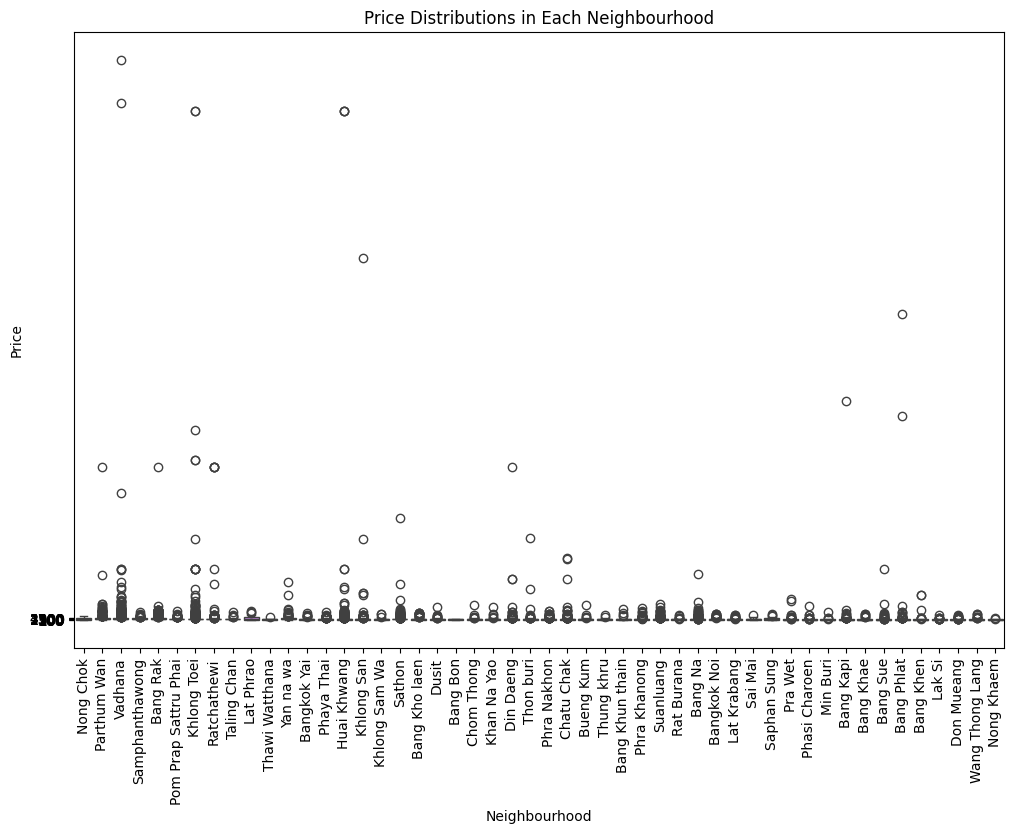

In [16]:
# boxplot of price in raw dataframe

# Calculate median price for each neighbourhood and sort by median
sorted_df_clean2 = df_clean2.groupby('neighbourhood')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))

# Plot the boxplot with sorted neighbourhoods
sns.boxplot(x=pd.Categorical(df_clean2['neighbourhood'], categories=sorted_df_clean2, ordered=True), 
            y='price', data=df_clean2, hue='neighbourhood')

plt.title('Price Distributions in Each Neighbourhood')
plt.yticks(np.arange(100, 4501, 400))
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.show()


It is hard to draw any conclusion when boxplot is depressed because of extremely high price range. Hence, we think it is necessary to remove price outliers to understand price distribution.

In [17]:
# removing outliers in price
df_clean3 = df_clean2[df_clean2["price"]<=4500]

In [18]:
df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14389 entries, 0 to 15843
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      14389 non-null  int64         
 1   id                              14389 non-null  int64         
 2   name                            14389 non-null  object        
 3   host_id                         14389 non-null  int64         
 4   host_name                       14389 non-null  object        
 5   neighbourhood                   14389 non-null  object        
 6   latitude                        14389 non-null  float64       
 7   longitude                       14389 non-null  float64       
 8   room_type                       14389 non-null  object        
 9   price                           14389 non-null  int64         
 10  minimum_nights                  14389 non-null  int64         
 11  number_

In [37]:
# Aggregate median, max, and min for 'price' based on neighbourhood
price_stats2 = df_clean3.groupby('neighbourhood')['price'].agg(
    median_price='median',
    max_price='max',
    min_price='min'
).reset_index().sort_values(by='median_price', ascending=False)
print(price_stats2)

           neighbourhood  median_price  max_price  min_price
29           Parthum Wan        1935.5       4494        331
8               Bang Rak        1732.0       4500        295
47               Vadhana        1727.0       4500        350
39        Samphanthawong        1714.0       4500        350
22           Khlong Toei        1581.0       4500        332
37           Ratchathewi        1514.0       4500        320
44        Thawi Watthana        1500.0       2500        500
43           Taling Chan        1381.0       4500        317
49             Yan na wa        1370.0       4500        400
34  Pom Prap Sattru Phai        1351.5       4000        330
31            Phaya Thai        1350.0       4429        360
11           Bangkok Yai        1300.0       4500        350
21            Khlong San        1300.0       4500        330
41                Sathon        1286.0       4329        318
18           Huai Khwang        1280.0       4500        313
17                 Dusit

## Removing outliers in minimum nights


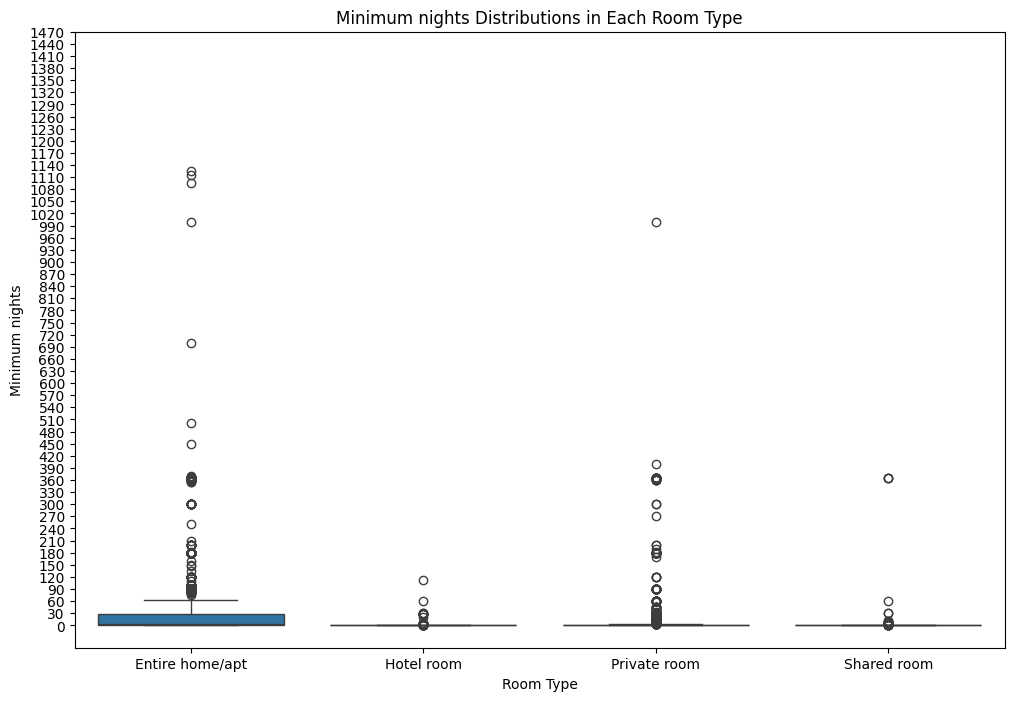

Index(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'], dtype='object', name='room_type')

In [19]:
# Minimum nights distributions of each room type, sorted by median in boxplot

min_nights_room_type = df_clean3.groupby('room_type')['minimum_nights'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))

sns.boxplot(x=pd.Categorical(df_clean3['room_type'], categories=min_nights_room_type, ordered=True), 
            y='minimum_nights', data=df_clean3, hue='room_type')

plt.title('Minimum nights Distributions in Each Room Type')
plt.yticks(np.arange(0, 1500, 30))
plt.xlabel("Room Type")
plt.ylabel("Minimum nights")
plt.show()
min_nights_room_type

Based on above figures, we see there are certain outliers as to where listing requires minimum nights more than a year (365 days). Which is rare, and albeit interesting, afraid any conclusion based on it will not be applicable for majority of actual condition, hence we decided to drop. However, from it we also understand that demand for long term listing is exist and need to be explored further. Might as well be an option for customer who plans for business trip.

In [20]:
#categorize minimum nights and drop the outliers
def classify_min_night(minimum_nights):
    if minimum_nights == 0:
        return '0 days'
    elif minimum_nights <= 3:
        return 'Up to 3 days'
    elif minimum_nights <= 7:
        return 'Up to 7 days'
    elif minimum_nights <= 30:
        return 'Up to a month'
    elif minimum_nights <= 180:
        return 'Up to 6 months'
    elif minimum_nights <= 365:
        return 'Up to a year'
    else:
        return 'More than a year'

df_clean4 = df_clean3.copy()
df_clean4['min_night_category'] = df_clean4['minimum_nights'].apply(classify_min_night)

df_clean4 = df_clean4[df_clean4['min_night_category'] != 'More than a year']
df_clean4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14379 entries, 0 to 15843
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      14379 non-null  int64         
 1   id                              14379 non-null  int64         
 2   name                            14379 non-null  object        
 3   host_id                         14379 non-null  int64         
 4   host_name                       14379 non-null  object        
 5   neighbourhood                   14379 non-null  object        
 6   latitude                        14379 non-null  float64       
 7   longitude                       14379 non-null  float64       
 8   room_type                       14379 non-null  object        
 9   price                           14379 non-null  int64         
 10  minimum_nights                  14379 non-null  int64         
 11  number_

We divided listing based on minimum nights into several groups to ease the analysis process
1. Listing without any minimum nights
2. Listing with minimum nights under than 3 days
3. Listing with minimum nights up to a week
4. Listing with minimum nights up to a month
5. Listing with minimum nights up to a year
6. Listing with minimum nights more than a year

## Grouping price range of listing

Price often correlating with class and amenities listings has to offer. Hence, we decided to group listings into several categories to understand customer preferencies on listing class.

In [21]:
#categorize minimum nights and drop the outliers
def classify_price(price):
    if price <= 600 :
        return 'Budget (100 - 600 THB)'
    elif price <= 1500:
        return 'Standard (601 - 1500 THB)'
    elif price <= 3000:
        return 'Premium (1501 - 3000 THB)'
    else:
        return 'Luxury (>3001 THB)'

df_clean5 = df_clean4.copy()
df_clean5['Price_classification'] = df_clean5['price'].apply(classify_price)
df_clean5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14379 entries, 0 to 15843
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      14379 non-null  int64         
 1   id                              14379 non-null  int64         
 2   name                            14379 non-null  object        
 3   host_id                         14379 non-null  int64         
 4   host_name                       14379 non-null  object        
 5   neighbourhood                   14379 non-null  object        
 6   latitude                        14379 non-null  float64       
 7   longitude                       14379 non-null  float64       
 8   room_type                       14379 non-null  object        
 9   price                           14379 non-null  int64         
 10  minimum_nights                  14379 non-null  int64         
 11  number_

Finally, we begin with 15,854 entries, and end with 14,379 entries. Meaning, we have shed 9.8% of the data, in which should be acceptable considering it is still under 30%.

In [22]:
#saving cleaned dataframe to csv
df_clean5.to_csv("cleaned_airbnb_data.csv", index=False)

# Listing Profiling

To get listing offered to right customer who actually need it, we need to get full visibility on what makes listing popular. Thus, we do popular listing profiling.

1. Listing distribution per neighborhood
2. Price distributions per neighborhood
3. Deal rate based on neighborhood
4. Room type distributions
5. Price distribution per Room Type
6. Deal rate based on room type
7. Minimum nights effect on listing exposure
8. Peak season analysis
9. Deal rate based on price

## Listing distribution per neighborhood
Profiling all listings begins with figuring out where is the cluster of listing centered. Analysis was done based on laying all the data in maps and as well barplot.

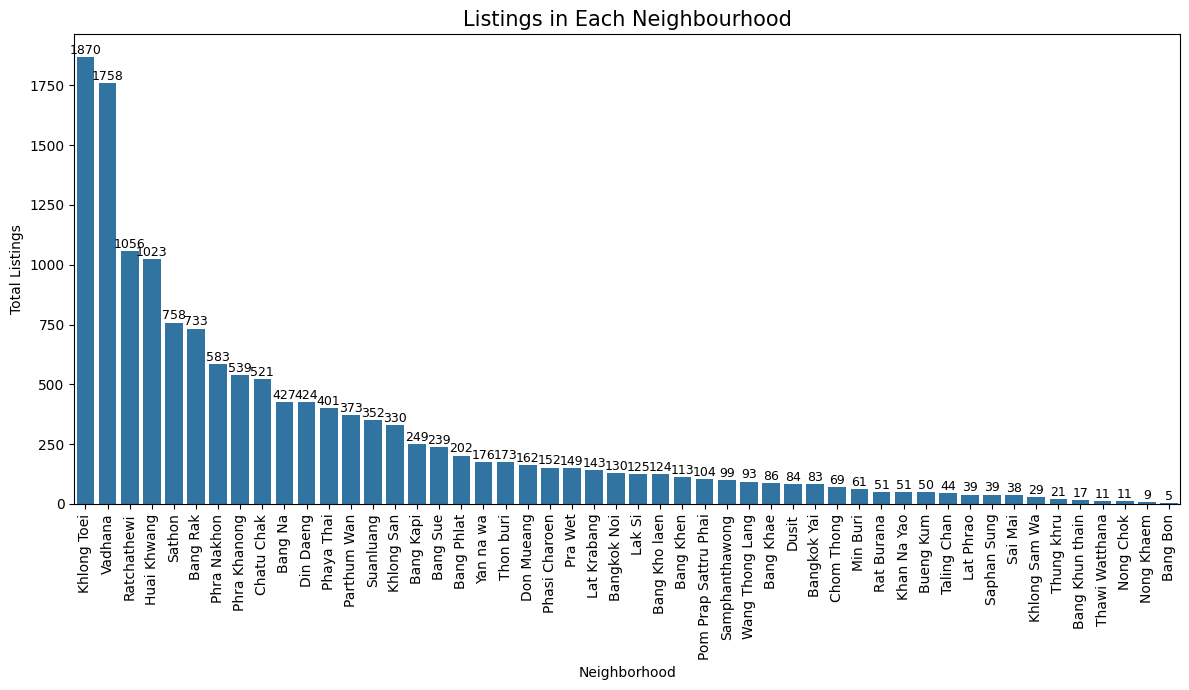

In [36]:
# Listings each Neighbourhood in barplot
neighbourhoods_qty = df_clean5.groupby('neighbourhood')['id'].count().reset_index(name='total_listings').sort_values(by='total_listings', ascending=False)

plt.figure(figsize=(12, 7))

# Create the barplot
bars = sns.barplot(data=neighbourhoods_qty, x="neighbourhood", y="total_listings")
plt.xticks(rotation=90)
plt.title("Listings in Each Neighbourhood", size=15)
plt.xlabel("Neighborhood")
plt.ylabel("Total Listings")

# Add labels for each bar
for bar in bars.patches:
    # Calculate label position
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    plt.text(
        bar_x, bar_height + 0.5,  # 0.5 is the offset above the bar
        f"{int(bar_height)}",  # Display as integer
        ha='center', va='bottom', fontsize=9, color='black'
    )

plt.tight_layout()
plt.show()


Insights:
Both graphic showing majority of listings are clustered in Khlong Toei and Vadhana. This conclusion align with the facts that both neighborhood is the most sought after place to stay for tourist considering several reasons below:
1. International hub and one of the best-developed areas in Bangkok
2. Great access to Sukhumvit Road and the city’s subway system for easier travelling plans
3. Diverse nightlife and numerous foreign restaurants ranging from Japanese to American, serving choices for international tourists who sides in more familiar taste options
4. Many historical and cultural attractions as the heart of Bangkok tourism

High demand on these neighbourhoods raising the opening of offered listing. Based on that, we can draw several points:
1. Both neighbourhood are generally the best developed areas in Bangkok and thus high possibility that many host (including listing feature and amenities) have already experienced in handling varieties of tourist. This will increase possibility of your satisfaction after the stay.
2. High counts of listings is equal to high varieties of type of listings, meaning, there will be more wider range of user with different needs covered.
3. If you are newbie travelers in "Bangkok", listings in Khlong Toei and Vadhana is our best bet to reach maximal pleasant experience with low possibility of disappointment considering well experienced host and listings

## Price distributions per neighborhood

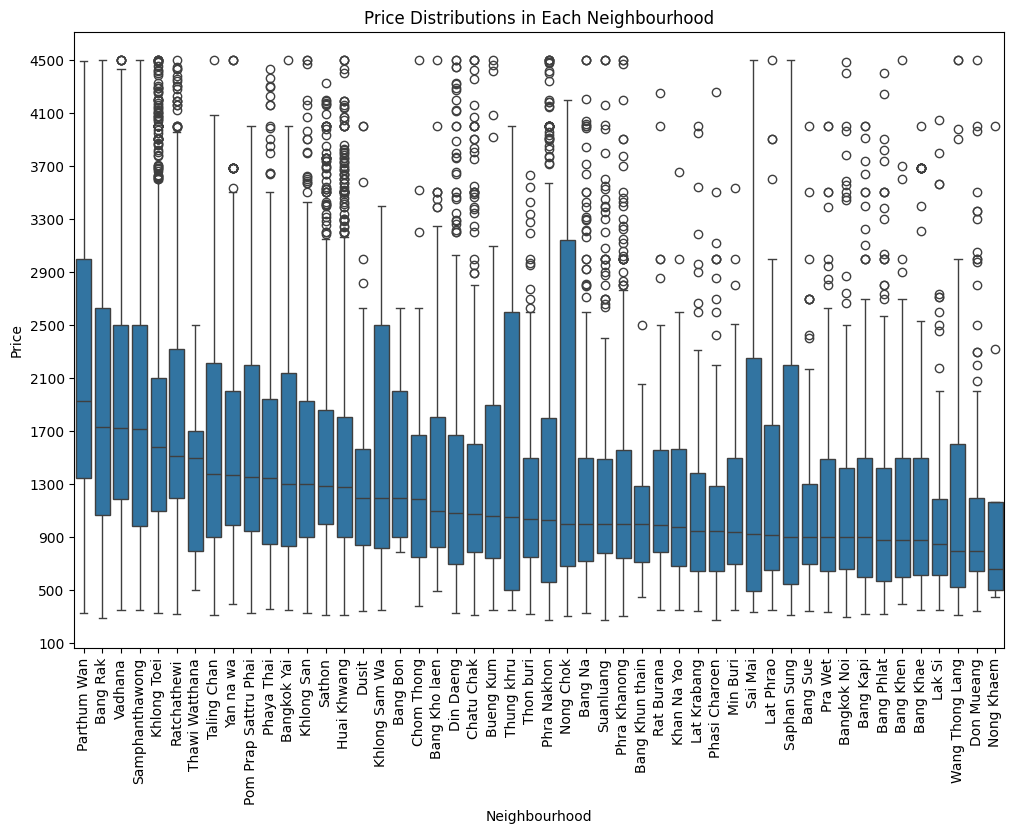

In [24]:
# Price distributions of each neighbourhood, sorted by median in boxplot

# Calculate median price for each neighbourhood and sort by median
sorted_neighbourhoods = df_clean5.groupby('neighbourhood')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))

# Plot the boxplot with sorted neighbourhoods
sns.boxplot(x=pd.Categorical(df_clean5['neighbourhood'], categories=sorted_neighbourhoods, ordered=True), 
            y='price', data=df_clean5)

plt.title('Price Distributions in Each Neighbourhood')
plt.yticks(np.arange(100, 4501, 400))
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.show()


Insights:
Parthum Wan have the highest median price with generally higher price range compare to neighboring districts. There are several possible reasons:
1. Pathum Wan is one of Bangkok's prime areas known for high-end shopping malls
2. Home to many upscale residences, luxury condos, and boutique hotels
3. Close to business districts

Reccomendations:
From above possible reasons, Parthum Wan might be great options if you are:
1. Users who plans for a business travel
2. Users who desire high-end stay with five star qualities
3. Users who seek for branded goods and luxurious lifestyle

If you are on budget and seek for affordable price yet still aim to checks all popular tourism list?. For this, easy access to mobility might be the answer. In which, we can offer listing in Phra Nakhon or Bang Na where as still near with Bangkok Transit System (BTS) but is still in the middle of range price.

## Deal rate based on Neighborhood

In this analysis, we will use two variables to define deal rate, which is number of reviews and day availability in a year. This choice is based on the assumptions:
1. Only customer who have done booking that able to leave reviews on the listings. We dont neglect that reviews can still mean two things, customer is very pleasant with the stay or exactly in a complete opposite. Whatever the reviews may be, it still counts how far the exposure of certain listings have. Thus, we make it as our primary predictor on the exposure.
2. On the second predictor, we will have day availability. Day availability is count of days when the listings is not yet booked. More booking happen, the less day available. However, we can only place it as secondary predictor considering there is also chance of self booked by the host due to certain reasons that makes certain data is biased.
By having clear picture on listing deal rate, we can quite sum up whether certain listing is worth your stay.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7576\3116220710.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


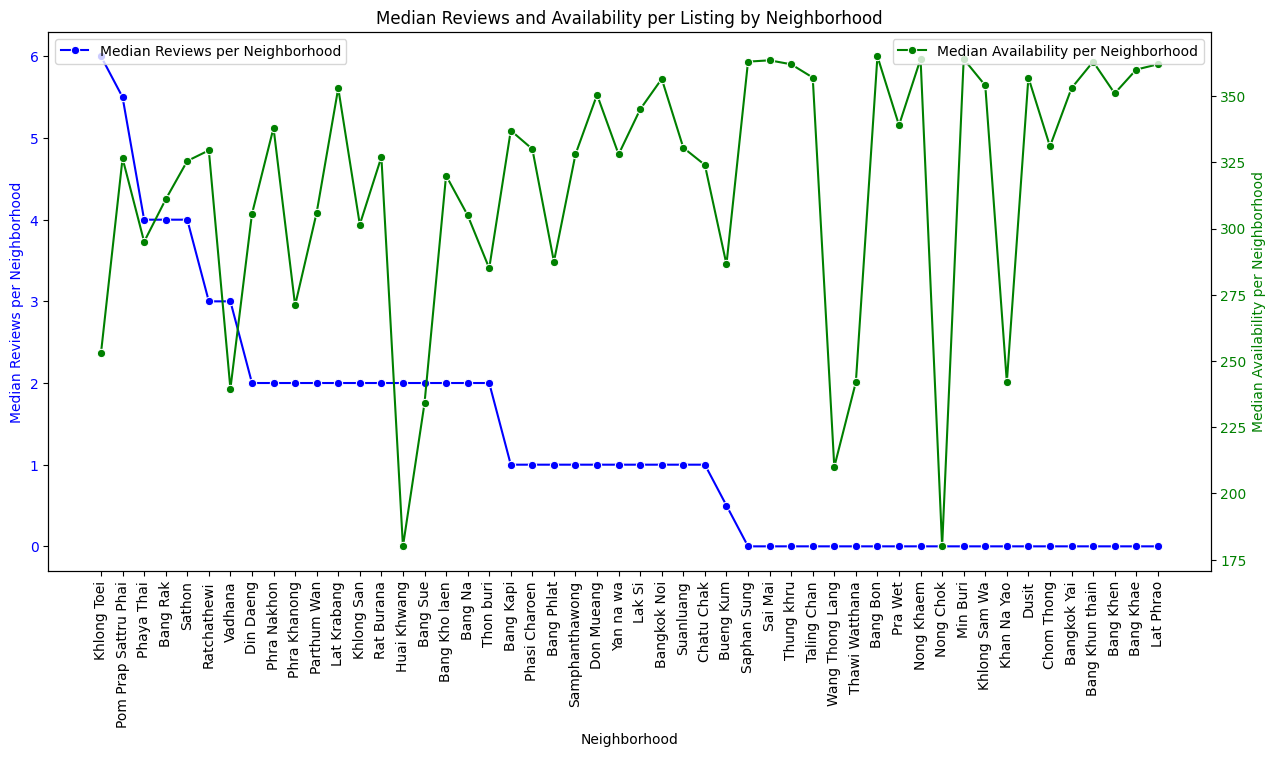

In [25]:
# Calculate median reviews per listing based on neighborhood
neighborhood_reviews_median = df_clean5.groupby('neighbourhood')['number_of_reviews'].median().reset_index(name='median_reviews')

# Calculate median availability per listing based on neighborhood
neighborhood_availability_median = df_clean5.groupby('neighbourhood')['availability_365'].median().reset_index(name='median_availability_365')

# Merge the two DataFrames on 'neighbourhood'
combined_data_median = neighborhood_reviews_median.merge(
    neighborhood_availability_median,
    on='neighbourhood'
)

# Sort the DataFrame by 'median_reviews' in descending order
combined_data_median = combined_data_median.sort_values(by='median_reviews', ascending=False)

# Set up the figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot for median reviews per listing on the primary y-axis
sns.lineplot(data=combined_data_median, x='neighbourhood', y='median_reviews', marker='o', ax=ax1, color='b', label='Median Reviews per Neighborhood')
ax1.set_ylabel('Median Reviews per Neighborhood', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlabel('Neighborhood')
ax1.set_title('Median Reviews and Availability per Listing by Neighborhood')

# Set up the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=combined_data_median, x='neighbourhood', y='median_availability_365', marker='o', ax=ax2, color='g', label='Median Availability per Neighborhood')
ax2.set_ylabel('Median Availability per Neighborhood', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adding legends for both lines
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

plt.show()


In more positive lights, number of reviews should be in contradictory position with day availability. More positive reviews received will generate numbers of booking, hence reducing days availability. 
Based on number of reviews:
1. Khlong Toei fulfilled our initial assumption. With 13.01% of total samples, it has the highest median numbers of reviews, with generally low rate of day availability. But we don't see huge drop on days available as well that might correlating with high numbers of hotel available. Meaning, this high demand is covered with also high stock of available listings. In other words, despite of the high competitiveness, listing in Khlong Toei will be more likely to have visitor than rest of the neighborhood. On this we believe price range will have more play to persuade each customer on the listing.
2. With serving 0.72% of total samples (104 listings), Pom prap sattru phai have high numbers of reviews but also high days available. This might signaling a bad reviews hence leaving more days available, less booking was made. However, this assumption need to be verified with users satisfaction data if any. 
3. There is huge drop on days available in Huai Khwang and also Nong Chok.
4. Huai Khwang have 7.11% listings of total samples (1023 listings). So we can say numbers available is quite legit considering the possibility of many of the listings are booked by their own host is very low. As per researched, Huai Khwang is metropolitan district near center area. It is also known as secondary options for every travellers who opt for cheaper stay but still have relatively close access to tourism amusement place. Thus, no wonder every listing seems very busy. This might signaling the high demand still cannot be covered with what market has to offer. 
5. We can also see huge drop in Nong Chok. However, Nong Chok only have 0.08% of total listings (11 listings). There is high possibility of biased data due to self booking happen.

Reccomendations:
1. If you are willing to pay more, Khlong Toei can be your top options considering it is well experienced with tourist and less likely sold for booking. Meaning, you still have many options on hand!
2. Despite of cheaper price, avoid Huai Khwang on peak season considering it will likely out of book. You need to book in advance for higher chance of getting a room
3. But don’t worry, listing in Pra Nakhon and Bang Na will likely have more room for you too book with cheaper price

## Room type distributions

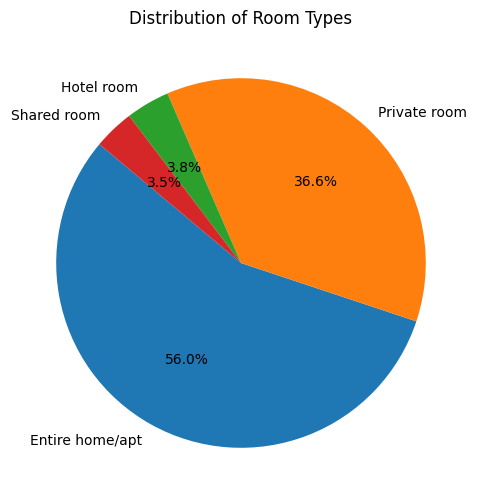

In [26]:
# Making pie chart showing room type distributions
room_type_counts = df_clean5['room_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Room Types")
plt.show()

Pie chart showing that entire home/apartment drives the majority of the listings. This is align to main reasons why certain users choose airbnb, because it is known as a place where you are looking for a home away from home.

Reccomendations:
1. Airbnb is your go to for searching a home away from your home
2. If you are searching for privacy, it is also serving much of private room.
3. If you are an adventurous travelers who look for unique social experience, there is also shared room available, but for now, the options may not as various as other types considering low counts of listing

## Price distribution per Room Type

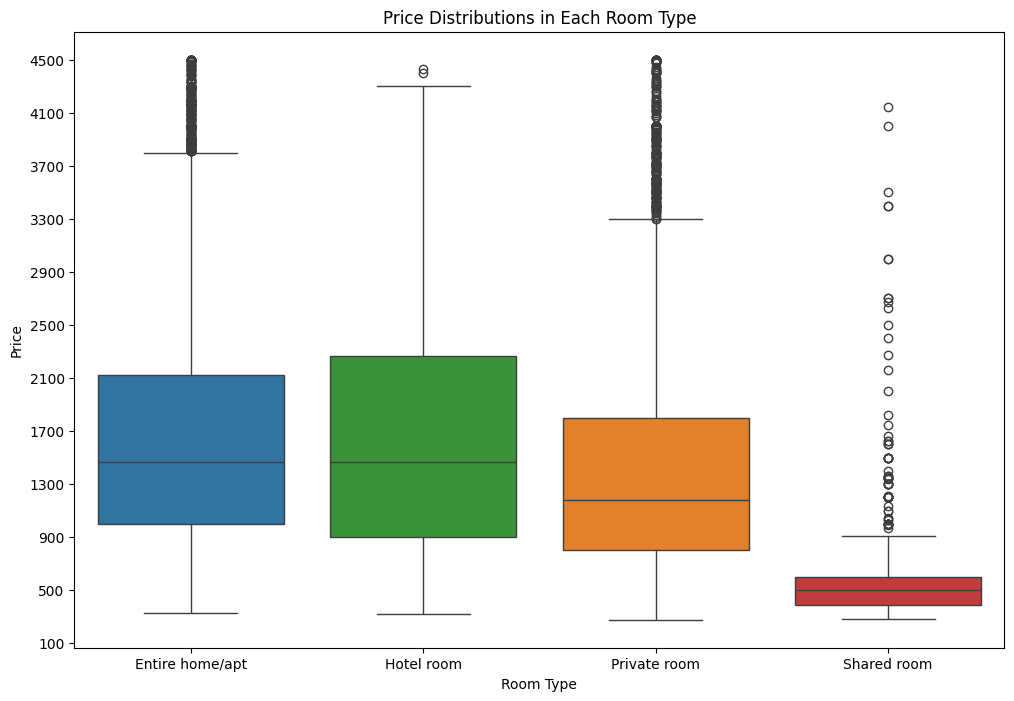

In [27]:
# Price distributions of each room type, sorted by median in boxplot

# Calculate median price for each room type and sort by median
sorted_room_type = df_clean5.groupby('room_type')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))

# Plot the boxplot with sorted neighbourhoods
sns.boxplot(x=pd.Categorical(df_clean5['room_type'], categories=sorted_room_type, ordered=True), 
            y='price', data=df_clean5, hue='room_type')

plt.title('Price Distributions in Each Room Type')
plt.yticks(np.arange(100, 4501, 400))
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

We can take several key points from above box plot:
1. Median price of entire home/apt is slightly similar to Hotel room in which aligns with most amenities and feature they offered. Especially how both offering secured privacy for you in foreign land
2. Private room have wider range of price that might be great options if you want slightly cheaper price but still aim for secluded staying place
3. Shared room are in for budget travellers considering its lowest range of price.

## Deal rate based on room type

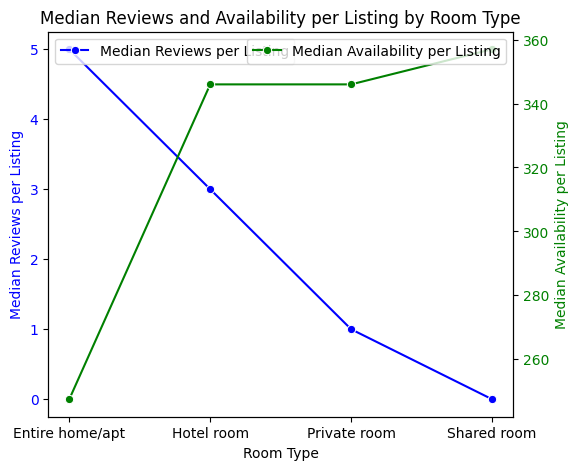

In [28]:
# Median reviews and day available in each units
# Calculate median reviews per listing based on room type
unit_reviews = df_clean5.groupby('room_type')['number_of_reviews'].median().reset_index(name='median_reviews')
# Calculate median availability per listing based on room type
unit_availability = df_clean5.groupby('room_type')['availability_365'].median().reset_index(name='median_availability_365')

# Merge the two DataFrames on 'room_type'
combined_data = unit_reviews[['room_type', 'median_reviews']].merge(
    unit_availability[['room_type', 'median_availability_365']],
    on='room_type'
)

# Set up the figure and primary axis
fig, ax1 = plt.subplots(figsize=(6, 5))

# Plot for average reviews per listing on the primary y-axis
sns.lineplot(data=combined_data, x='room_type', y='median_reviews', marker='o', ax=ax1, color='b', label='Median Reviews per Listing')
ax1.set_ylabel('Median Reviews per Listing', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlabel('Room Type')
ax1.set_title('Median Reviews and Availability per Listing by Room Type')

# Set up the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=combined_data, x='room_type', y='median_availability_365', marker='o', ax=ax2, color='g', label='Median Availability per Listing')
ax2.set_ylabel('Median Availability per Listing', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adding legends for both lines
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()


Insights:
1. Median price of entire home/apt (1715.5 THB) is slightly similar to Hotel room (1556 THB) in which aligns with most amenities and feature they offered. 
2. Most of private room have wider range of price that might be great options if you want slightly cheaper price but still aim for secluded staying place (855 - 2459THB, med 1470 THB)
3. With its highest reviews and lowest days available, entire home/apt is the most popular type with the least popular is shared room

Reccomendations:
1. If you are looking for a secured privacy in foreign land, you can always choose entire home/apt with complete facilities. However, if you want cheaper option, you can still book a private room type
2. Shared room (415- 874 THB, median 565THB) are in for extroverted travelers who search for unique experience from other travelers. You can spend less on staying and more on your traveling journey. It also has more days available than rest of the types.

## Minimum nights effect on listing exposure

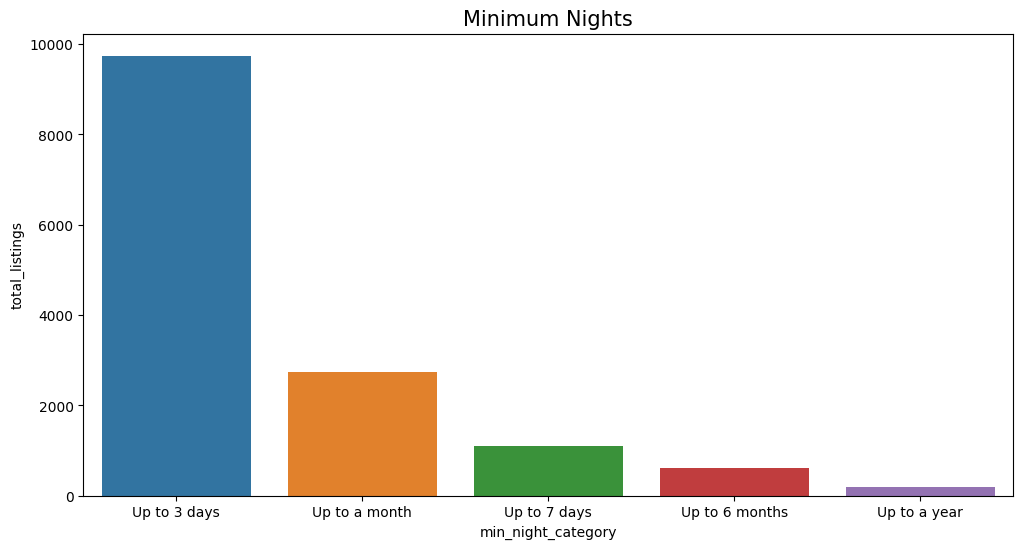

In [29]:
# Listings each Neighbourhood in barplot
min_nights_qty = df_clean5.groupby('min_night_category')['id'].count().reset_index(name='total_listings').sort_values(by='total_listings', ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(data=min_nights_qty, x="min_night_category", y="total_listings", hue= "min_night_category")
plt.xticks(rotation=0)
plt.title("Minimum Nights",size=15)
plt.show()

Above graphic showing majority of listings have minimum nights around 1 - 3 days and only a few requiring minimum nights more than a year. After that, we begin to insert average count in the equation. This was done by dividing count of reviews with count of listing in related category. After that, we distribute it in lineplot.

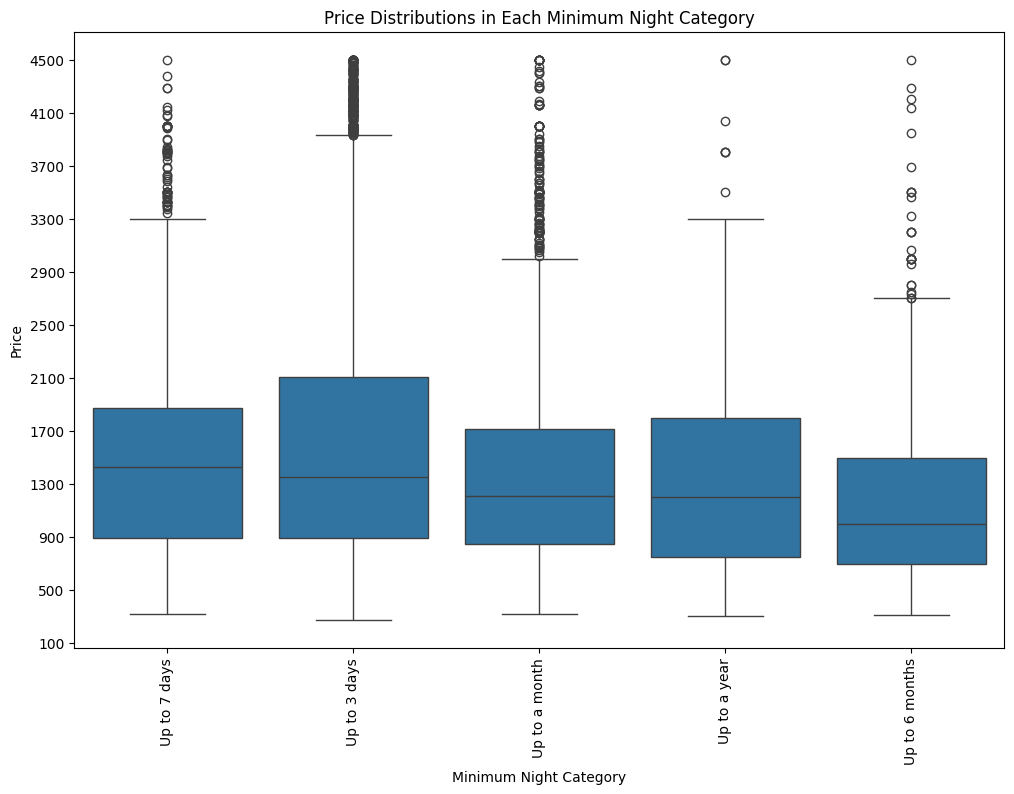

In [38]:
# Price distributions of each minimum night groups, sorted by median in boxplot

# Calculate median price for each neighbourhood and sort by median
sorted_min_nights = df_clean5.groupby('min_night_category')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))

# Plot the boxplot with sorted neighbourhoods
sns.boxplot(x=pd.Categorical(df_clean5['min_night_category'], categories=sorted_min_nights, ordered=True), 
            y='price', data=df_clean5)

plt.title('Price Distributions in Each Minimum Night Category')
plt.yticks(np.arange(100, 4501, 400))
plt.xticks(rotation=90)
plt.xlabel("Minimum Night Category")
plt.ylabel("Price")
plt.show()


Insights:
1. Most of listings required under 3 days minimum nights
2. Most of groups have similar median price, however, group with a year and 6 months minimum nights have cheaper price based on its median listing price compare to other groups

Reccomendations:
1. For your short term holiday, it is better to choose listing with minimum nights required 3 days rather than 7 days. Beside of its wider range available, it also have more varieties of listings considering it has most of the listings in Bangkok.
2. For you in business trips, listings for long term is also there, it also offers a great deal of price if you choose listing with longer nights required.

## When is the peak season

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7576\3830470002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean6_2022['last_review_month'] = df_clean6_2022['last_review'].dt.to_period('M')


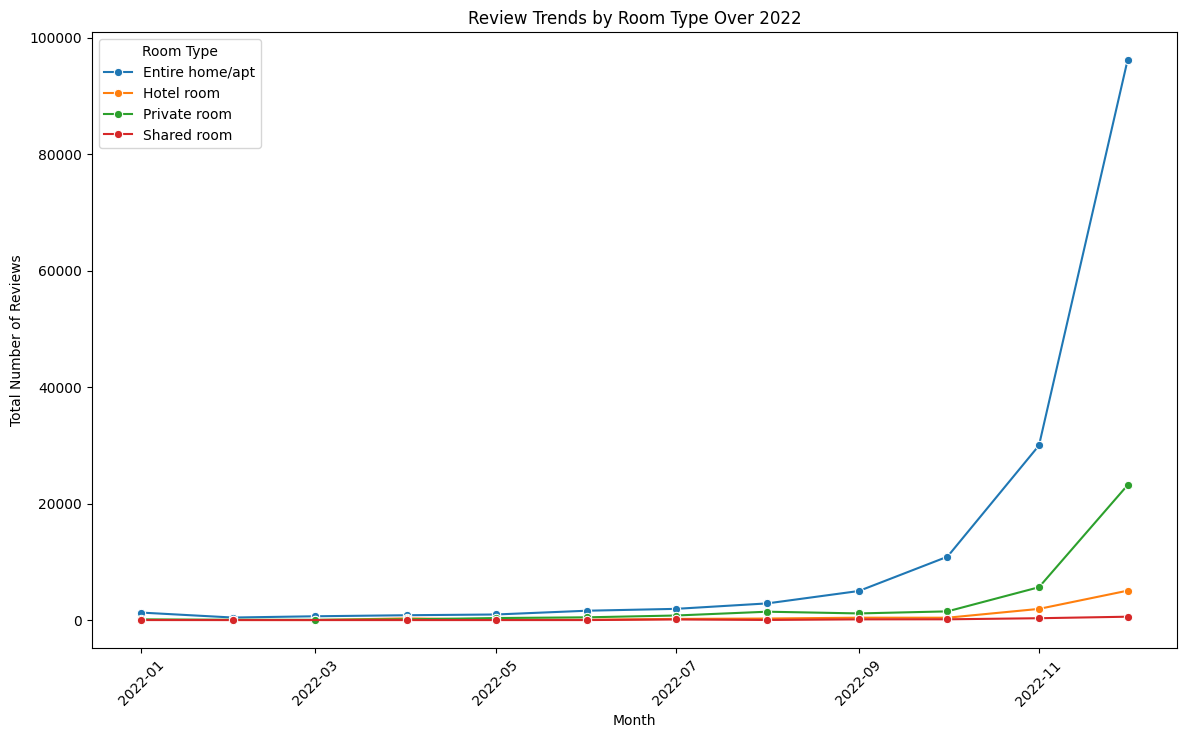

In [31]:
# Make a copy and drop rows where 'last_review' is missing
df_clean6 = df_clean5.copy()
df_clean6 = df_clean6.dropna(subset=['last_review'])

# Filter the data to only include reviews from the year 2022
df_clean6_2022 = df_clean6[df_clean6['last_review'].dt.year == 2022]

# Group by 'last_review' (binned by month) and 'room_type', and calculate the total number of reviews for each combination
df_clean6_2022['last_review_month'] = df_clean6_2022['last_review'].dt.to_period('M')
reviews_trends_by_room_type = df_clean6_2022.groupby(['last_review_month', 'room_type'])['number_of_reviews'].sum().reset_index()

# Convert 'last_review_month' back to datetime for plotting
reviews_trends_by_room_type['last_review_month'] = reviews_trends_by_room_type['last_review_month'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=reviews_trends_by_room_type, x='last_review_month', y='number_of_reviews', hue='room_type', marker='o')
plt.title('Review Trends by Room Type Over 2022')
plt.xlabel('Month')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()


## Price distributions

We cannot forget that price can drives more on what we agree and what is not. Thus, we believe it is necessary to study how price affect the popularity of the listings. But, as the range is high, based on further searching, we divided listings based on their price into 4 categories:
1. Budget listings (100 - 600 THB)
2. Standard listings (601 - 1500 THB)
3. Premium listings (1501 - 3000 THB)
4. Luxury listings (>3001 THB)

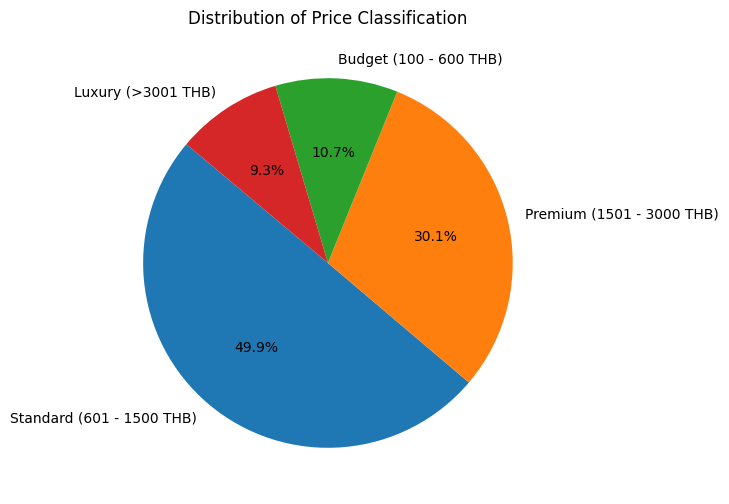

In [32]:
# Making pie chart showing price distributions
price_counts = df_clean5['Price_classification'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Price Classification")
plt.show()

## Deal rate based on price

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7576\3516645880.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)


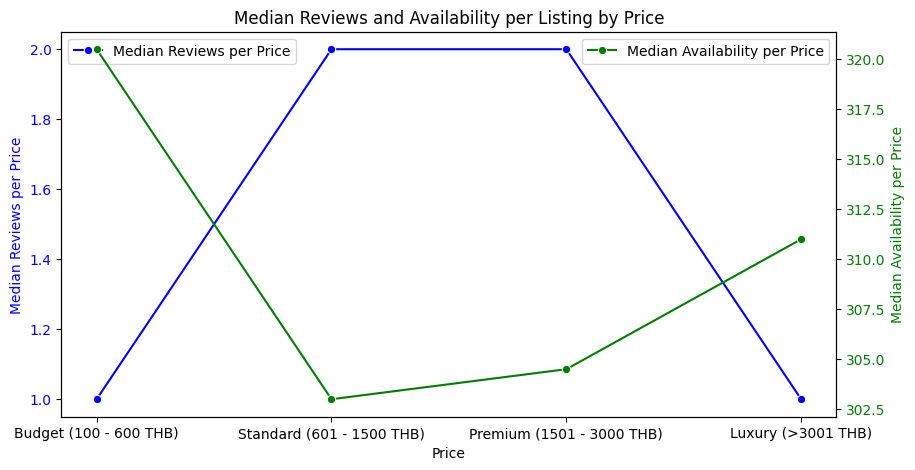

In [33]:
price_reviews_median = df_clean5.groupby('Price_classification')['number_of_reviews'].median().reset_index(name='median_reviews')
price_availability_median = df_clean5.groupby('Price_classification')['availability_365'].median().reset_index(name='median_availability_365')

combined_data_price = price_reviews_median.merge(
    price_availability_median,
    on='Price_classification'
)

custom_order = ['Budget (100 - 600 THB)', 'Standard (601 - 1500 THB)', 'Premium (1501 - 3000 THB)', 'Luxury (>3001 THB)']
combined_data_price['Price_classification'] = pd.Categorical(combined_data_price['Price_classification'], categories=custom_order, ordered=True)
combined_data_price = combined_data_price.sort_values(by='Price_classification')
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=combined_data_price, x='Price_classification', y='median_reviews', marker='o', ax=ax1, color='b', label='Median Reviews per Price')
ax1.set_ylabel('Median Reviews per Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlabel('Price')
ax1.set_title('Median Reviews and Availability per Listing by Price')

ax2 = ax1.twinx()
sns.lineplot(data=combined_data_price, x='Price_classification', y='median_availability_365', marker='o', ax=ax2, color='g', label='Median Availability per Price')
ax2.set_ylabel('Median Availability per Price', color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

plt.show()


Insights:
1. Almost half of listings have average rate (601  - 1500 THB)
2. Only 10.71% is in the budget rate (100 - 600 THB)

Reccomendations:
1. Standard and Premium room is very popular considering relatively high number of reviews and low days available
2. If you aim to book budget room, it may have lesser varieties compare to standard and premium one.

# CONCLUSIONS

## Where to book listing?
1. If you are clueless on what to stay? choose Khlong Toei or Vadhana for possibility of more varieties and more pleasant stay
2. Avoid listing in central area if you aim for cheaper price, choose Huai Khwang, Phra Nakhon, or Bang Na instead.
3. You have to book in advance for Huai Khwang considering its high demand



## What room?

1. Airbnb is definitely a place if you choose to stay in home/apt. So many varieties to serve your needs!
2. Second option with same security and privacy is private room or hotel room. Price is also similar
3. If you want to search for more cheaper options, you can choose shared room with relatively low price and more availabilities

## When to book?

1. You have to book in advance for plan trip on peak season (Oct - Dec)
2. It also need advance booking for plan trip on March considering Songkran Festival

## Small tips for you!

If planning for a week trip, don’t fall for listing with 7 days minimum requirement. It shows no different in rate compare to 3 days minimum requirement.
Better choose the latter instead considering wider range rate but more varieties. 